In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("flats.csv", delimiter=",", encoding="Windows-1251")

df = df.fillna("")
df.iloc[:, 0:1] = df.iloc[:, 0:1].replace("", "N/A")
df.iloc[:, 2:4] = df.iloc[:, 2:4].replace("", 0)
df.iloc[:, 4] = df.iloc[:, 4].astype(int)

df = df.drop_duplicates()
df = df[(df["Address"] != "N/A") & (df["Floor"] != 0) & (df["Square, м2"] != 0) & (df["Price, руб."] != 0)]

# Обработка таблицы

flats_df = df

# Площадь
total_sq, living_sq, kitchen_sq = [], [], []
for i in flats_df['Square, м2']:
  i = i.replace(',', '.')
  temp = i.split('/')
  total_sq.append(round(float(temp[0]), 2))
  living_sq.append(round(float(temp[1]), 2))
  kitchen_sq.append(round(float(temp[2]), 2))

# Этаж
curr_floors, total_floors = [], []
for i in flats_df['Floor']:
  if type(i) != 'int':
    temp = i.split('/')
    if temp[0] == '':
      curr_floors.append(0)
    if temp[1] == '':
      total_floors.append(0)
    else:
      curr_floors.append(int(temp[0]))
      total_floors.append(int(temp[1]))

flats_df = pd.DataFrame({"Flat type":flats_df["Flat type"],
                         "Current floor": curr_floors,
                         "Total floors":total_floors,
                         "Total area":total_sq,
                         "Living area":living_sq,
                         "Kitchen area":kitchen_sq,
                         "Price":flats_df["Price, руб."]})

flats_df

,Flat type,Current floor,Total floors,Total area,Living area,Kitchen area,Price
0,свердловский вариант,4,5,55.6,32.0,9.0,3600000
1,брежневка,2,5,47.0,33.0,6.0,3600000
2,брежневка,1,5,45.0,31.0,6.0,3100000
3,N/A,2,5,44.0,29.0,6.0,3300000
4,смежная,2,5,44.8,28.0,6.0,3200000
...,...,...,...,...,...,...,...
331,N/A,2,3,55.7,29.5,12.7,3287000
332,N/A,2,3,78.0,62.7,15.0,4446000
333,N/A,2,3,50.0,36.0,12.0,2590000
334,N/A,1,5,47.3,0.0,10.0,3000000


In [ ]:
flats_df['Flat type'].value_counts()

Flat type
N/A                     273
брежневка                13
нестандартная             9
раздельная                8
улучшенная                8
смежная                   5
хрущевка                  5
старой планировки         4
свердловский вариант      2
сталинский вариант        2
97 серия                  2
полусмежная               1
евродвушка                1
хабаровский вариант       1
раздельная брежн          1
евротрешка                1
Name: count, dtype: int64

In [ ]:
flats_df['Flat type'] = flats_df['Flat type'].replace({
    'N/A':273,
    'брежневка':13,
    'нестандартная':9,
    'раздельная':8,
    'улучшенная':8,
    'смежная':5,
    'хрущевка':5,
    'старой планировки':4,
    'свердловский вариант':2,
    'сталинский вариант':2,
    '97 серия':2,
    'полусмежная':1,
    'евродвушка':1,
    'хабаровский вариант':1,
    'раздельная брежн':1,
    'евротрешка':1,
    })

flats_df['Flat type'].value_counts()

Flat type
0     273
1      14
4       9
2       8
3       8
7       5
5       5
6       4
8       2
9       2
12      2
10      1
13      1
14      1
15      1
Name: count, dtype: int64

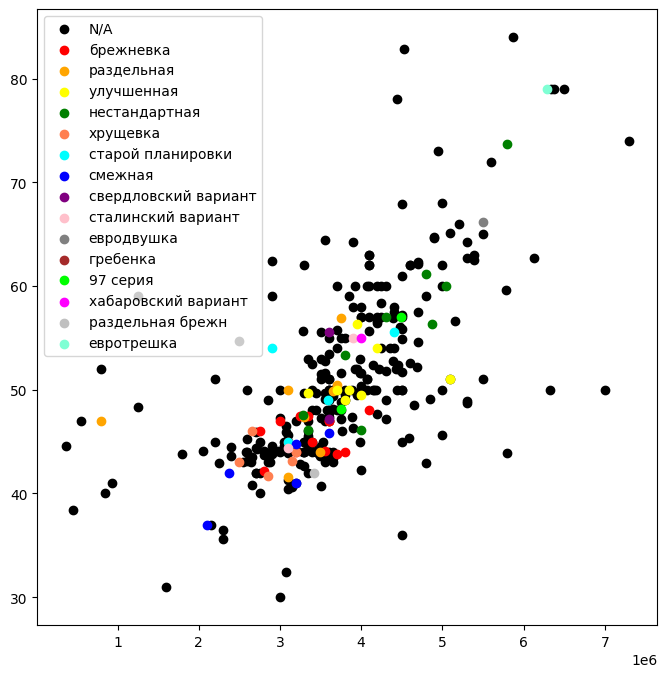

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(flats_df["Price"][flats_df['Flat type'] == 0], flats_df["Total area"][flats_df['Flat type'] == 0], c="black", label="N/A")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 1], flats_df["Total area"][flats_df['Flat type'] == 1], c="red", label="брежневка")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 2], flats_df["Total area"][flats_df['Flat type'] == 2], c="orange", label="раздельная")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 3], flats_df["Total area"][flats_df['Flat type'] == 3], c="yellow", label="улучшенная")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 4], flats_df["Total area"][flats_df['Flat type'] == 4], c="green", label="нестандартная")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 5], flats_df["Total area"][flats_df['Flat type'] == 5], c="coral", label="хрущевка")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 6], flats_df["Total area"][flats_df['Flat type'] == 6], c="cyan", label="старой планировки")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 7], flats_df["Total area"][flats_df['Flat type'] == 7], c="blue", label="смежная")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 8], flats_df["Total area"][flats_df['Flat type'] == 8], c="purple", label="свердловский вариант")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 9], flats_df["Total area"][flats_df['Flat type'] == 9], c="pink", label="сталинский вариант")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 10], flats_df["Total area"][flats_df['Flat type'] == 10], c="grey", label="евродвушка")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 11], flats_df["Total area"][flats_df['Flat type'] == 11], c="brown", label="гребенка")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 12], flats_df["Total area"][flats_df['Flat type'] == 12], c="lime", label="97 серия")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 13], flats_df["Total area"][flats_df['Flat type'] == 13], c="magenta", label="хабаровский вариант")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 14], flats_df["Total area"][flats_df['Flat type'] == 14], c="silver", label="раздельная брежн")
plt.scatter(flats_df["Price"][flats_df['Flat type'] == 15], flats_df["Total area"][flats_df['Flat type'] == 15], c="aquamarine", label="евротрешка")

plt.legend()

plt.show()

In [ ]:
x = flats_df.values[:, 1:]
x = np.nan_to_num(x)
cluster_dataset = StandardScaler().fit_transform(x)
cluster_dataset

array([[ 0.02912376, -0.42399285,  0.59163871, ...,  0.23401203,
        -0.11411054, -0.85238041],
       [-0.72361344, -0.42399285, -0.43280953, ..., -0.76804458,
        -0.11411054, -0.85238041],
       [-1.09998205, -0.42399285, -0.6710533 , ..., -0.76804458,
        -0.61362257, -0.85238041],
       ...,
       [-0.72361344, -1.03937773, -0.07544386, ...,  1.23606864,
        -1.12312483, -0.85238041],
       [-1.09998205, -0.42399285, -0.39707296, ...,  0.5680309 ,
        -0.71352497, -0.85238041],
       [-1.09998205, -0.42399285, -1.14754085, ..., -0.36722194,
        -2.78150477, -0.85238041]])

In [ ]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 2 0 0 1 1 0 0 2 0 1 2 0 2 1 1 1 2 1 0 0
 2 1 1 1 1 1 2 1 1 1 2 0 0 0 2 2 2 0 0 2 1 1 0 0 1 1 0 2 0 1 1 1 2 0 1 1 1
 2 1 1 1 2 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 2 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 2 1 1 0 2 1 0 2 0 0 1 1 1 1 2 1 1 1 1 0 1 2 2 0 1 2 1 0 0
 0 1 0 2 0 0 2 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 2 0 1 1 1 2 1 1 1 1 2 0 1 1 1
 1 0 0 1 2 2 1 1 1 2 1 1 2 1 2 1 1 0 2 1 1 0 0 1 1 2 1 1 1 1 0 0 0 2 1 0 0
 0 1 1 0 1 1 1 1 2 1 1 0 0 1 1 2 1 0 1 2 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 2 1 2 1 2 2 2 1 2 2 1 2 1 1 1 1 1 0 0 2 1 0 0 1 2 2 1 0 0 1 1 1 2 1 0 2
 1 2 0 1 1 0 1 1 2 1 1 1 0 1 1 1 1 1 1 2 0 2 2 1 2 1 2 1 1 1 1 2 0 2 1 2 2
 1 1 1]


In [ ]:
flats_df["Labels"] = labels
flats_df

,Flat type,Current floor,Total floors,Total area,Living area,Kitchen area,Price,Labels
0,8,4,5,55.6,32.0,9.0,3600000,1
1,1,2,5,47.0,33.0,6.0,3600000,1
2,1,1,5,45.0,31.0,6.0,3100000,1
3,0,2,5,44.0,29.0,6.0,3300000,1
4,7,2,5,44.8,28.0,6.0,3200000,1
...,...,...,...,...,...,...,...,...
331,0,2,3,55.7,29.5,12.7,3287000,2
332,0,2,3,78.0,62.7,15.0,4446000,2
333,0,2,3,50.0,36.0,12.0,2590000,1
334,0,1,5,47.3,0.0,10.0,3000000,1


In [ ]:
flats_df.groupby('Labels').mean()

,Flat type,Current floor,Total floors,Total area,Living area,Kitchen area,Price
Labels,,,,,,,
0,0.791209,6.967033,10.483516,53.458242,30.441758,8.895604,4.210290e+06
1,0.988950,2.834254,4.872928,45.564641,28.081768,6.718232,3.144287e+06
2,0.515625,2.671875,4.796875,60.951563,36.960938,11.923438,4.620722e+06


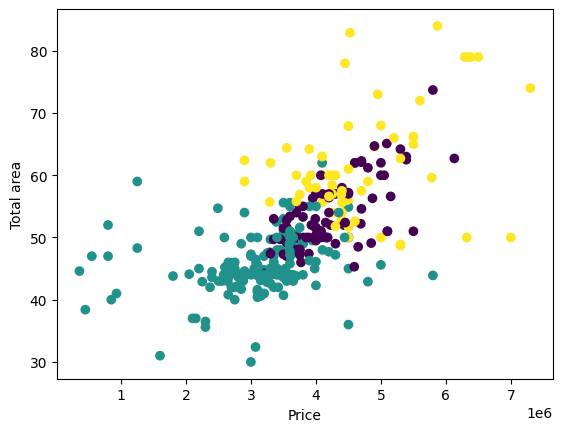

In [ ]:
plt.scatter(flats_df['Price'], flats_df['Total area'], c=flats_df.Labels)
plt.xlabel('Price')
plt.ylabel('Total area')
plt.show()

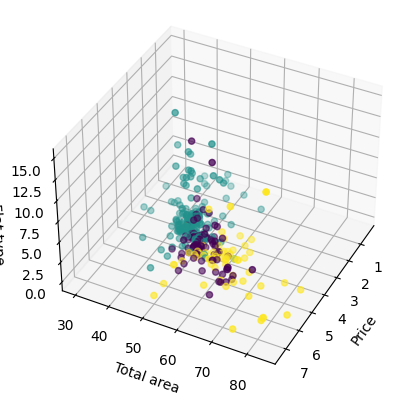

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=38, azim=27)

ax.set_xlabel('Price')
ax.set_ylabel('Total area')
ax.set_zlabel('Flat type')

ax.scatter(flats_df['Price'], flats_df['Total area'], flats_df['Flat type'], c=flats_df.Labels)

Примерная характеристика кластеров:

Бирюзовый- Средняя цена и большая площадь

Фиолетовый - Цена меньше средней, малая площадь

Желтый - Цена средняя, средняя площадь